# Poiseuille Under Pressure

In [1]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
refViscosity = 1e6 * u.pascal * u.second
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter))

In [5]:
Model.density = 500 * u.kilogram / u.metre**3
Model.viscosity = 1e6 * u.pascal  * u.second


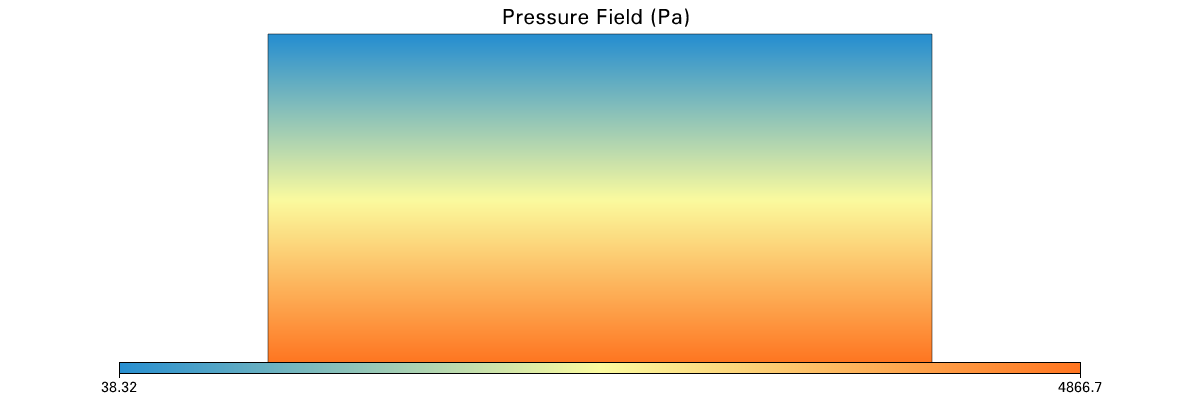

In [6]:
Fig = vis.Figure(figsize=(1200,400), title="Pressure Field (Pa)", quality=3)
Fig.Surface(Model.mesh, Model.lithostatic_pressureField * GEO.dimensionalise(1.0, u.pascal).magnitude)
Fig.show()

In [7]:
Model.set_stressBCs(left=[-Model.lithostatic_pressureField + GEO.nd(100 * u.pascal), None],
                    right=[Model.lithostatic_pressureField + GEO.nd(100 * u.pascal), None])

In [8]:
Model.set_velocityBCs(bottom=[None, 0.], top=[None, 0.])

In [9]:
Model.init_model()

In [10]:
Model.run_for(nstep=2)

Running with UWGeodynamics version 2.8.1-dev-ac016ab(LecodeGeneralise)
Options:  -rescale_equations False -remove_constant_pressure_null_space False -Q22_pc_type uw -change_A11rhspresolve False -change_backsolve False -ksp_k2_type NULL -pc_type none -ksp_type bsscr -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-06 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Step:     1 Model Time: 0.0 second dt: 0.0 second (2019-03-28 23:49:12)
Step:     2 Model Time: 0.0 second dt: 0.0 second (2019-03-28 23:49:13)


1

/usr/local/lib/python3.5/dist-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)



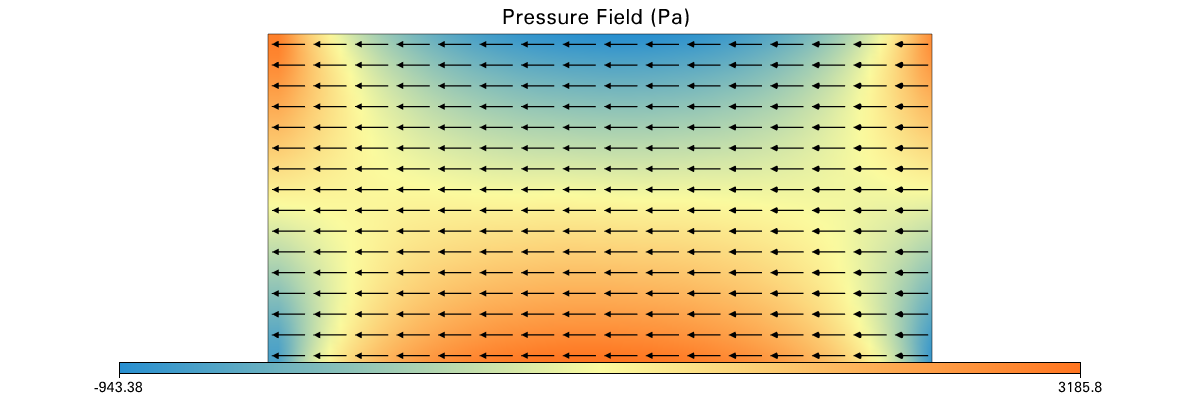

In [11]:
Fig = vis.Figure(figsize=(1200,400), title="Pressure Field (Pa)", quality=3)
Fig.Surface(Model.mesh, GEO.dimensionalise(Model.pressureField, u.pascal))
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()